# Calculation of RMSF for each TIGIT monomer

In [1]:
import MDAnalysis as mda
import xdrlib
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align
from tqdm import tqdm
import numpy as np
import nglview as nv
import time
import MDAnalysis.transformations as trans
import pandas as pd

/home/ralves/anaconda3/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


##### 8JEO

In [2]:
u_8jeo = mda.Universe("8JEO/md.gro", "8JEO/final.xtc") # Universe (.gro file, trajectory .xtc file)
calphas_8jeo = u_8jeo.select_atoms("name CA") # Choice of alfa-Carbon atoms

In [3]:
breaks = []
beginnings = [calphas_8jeo.resids[0]]

# Iterate over the indices of calphas_3q0h.resids except the last one

for i in range(len(calphas_8jeo.resids) - 1):
    if calphas_8jeo.resids[i + 1] != calphas_8jeo.resids[i] + 1:
        breaks.append(calphas_8jeo.resids[i])
        beginnings.append(calphas_8jeo.resids[i+1])
breaks.append(calphas_8jeo.resids[-1])

start_indexes = [0] # Chains start at index 0
final_indexes = [] # List of final chain indices 

for residue in breaks:
    list_indices = u_8jeo.select_atoms(f'resid {residue}').indices
    for i in range(len(list_indices)-1):
        if list_indices[i+1] != list_indices[i] + 1:
            start_indexes.append(list_indices[i] + 1) # The start of the next chain is the last index of the chain before + 1
            final_indexes.append(list_indices[i])
    if breaks[-1] == residue:
        final_indexes.append(list_indices[-1])

for i in range(len(start_indexes)):
    print(f"Chain {chr(65 + i)} starts at atom index {start_indexes[i]} and ends at atom index {final_indexes[i]}.") # For each break, indicate the chain, starting index and final index

residue_numbers = []  # List to store groups of residues
residue_names = []    # List to store names of residues

# Assume breaks is defined and calphas_3q0h.resids and calphas_3q0h.resnames are accessible

# Iterate over each break point
for i, number in enumerate(breaks):
    chain_residue_numbers = []  # Store residues for the current break
    chain_residue_names = []     # Store names for the current break
    beginning = beginnings[i]
    # Iterate through all residues
    for i, residue in enumerate(calphas_8jeo.resids):
        if beginning <= residue <= number:
            if residue not in chain_residue_numbers:  # Avoid duplicates
                chain_residue_numbers.append(residue)
                chain_residue_names.append(calphas_8jeo.resnames[i])
    
    residue_numbers.append(chain_residue_numbers)  # Append collected residues
    residue_names.append(chain_residue_names)      # Append collected names


# Combine the lists into one final list of lists in the format residue_name-residue_number
residues_list = []

for name_list, number_list in zip(residue_names, residue_numbers):
    combined = [f"{name}-{num}" for name, num in zip(name_list, number_list)]
    residues_list.append(combined)

Chain A starts at atom index 0 and ends at atom index 1030.
Chain B starts at atom index 1031 and ends at atom index 2336.
Chain C starts at atom index 2337 and ends at atom index 4514.
Chain D starts at atom index 4515 and ends at atom index 6478.
Chain E starts at atom index 6479 and ends at atom index 7784.
Chain F starts at atom index 7785 and ends at atom index 2448.
Chain G starts at atom index 2449 and ends at atom index 4626.
Chain H starts at atom index 4627 and ends at atom index 3140.
Chain I starts at atom index 3141 and ends at atom index 5438.
Chain J starts at atom index 5439 and ends at atom index 1030.
Chain K starts at atom index 1031 and ends at atom index 2336.
Chain L starts at atom index 2337 and ends at atom index 4514.
Chain M starts at atom index 4515 and ends at atom index 6478.
Chain N starts at atom index 6479 and ends at atom index 7784.
Chain O starts at atom index 7785 and ends at atom index 2440.
Chain P starts at atom index 2441 and ends at atom index 4

In [4]:
residues_list = np.load("residues_list.npy")

In [5]:
residues_list

array(['MET/HIS-21', 'MET/HIS-22', 'MET-23', 'THR-24', 'GLY-25', 'THR-26',
       'ILE-27', 'GLU-28', 'THR-29', 'THR-30', 'GLY-31', 'ASN-32',
       'ILE-33', 'SER-34', 'ALA-35', 'GLU-36', 'LYS-37', 'GLY-38',
       'GLY-39', 'SER-40', 'ILE-41', 'ILE-42', 'LEU-43', 'GLN-44',
       'CYS-45', 'HIS-46', 'LEU-47', 'SER-48', 'SER-49', 'THR-50',
       'THR-51', 'ALA-52', 'GLN-53', 'VAL-54', 'THR-55', 'GLN-56',
       'VAL-57', 'ASN-58', 'TRP-59', 'GLU-60', 'GLN-61', 'GLN-62',
       'ASP-63', 'GLN-64', 'LEU-65', 'LEU-66', 'ALA-67', 'ILE-68',
       'CYS/SER-69', 'ASN-70', 'ALA-71', 'ASP-72', 'LEU-73', 'GLY-74',
       'TRP-75', 'HIS-76', 'ILE-77', 'SER-78', 'PRO-79', 'SER-80',
       'PHE-81', 'LYS-82', 'ASP-83', 'ARG-84', 'VAL-85', 'ALA-86',
       'PRO-87', 'GLY-88', 'PRO-89', 'GLY-90', 'LEU-91', 'GLY-92',
       'LEU-93', 'THR-94', 'LEU-95', 'GLN-96', 'SER-97', 'LEU-98',
       'THR-99', 'VAL-100', 'ASN-101', 'ASP-102', 'THR-103', 'GLY-104',
       'GLU-105', 'TYR-106', 'PHE-107', 'CYS-

In [8]:
residues_list[1:-3]

array(['MET/HIS-22', 'MET-23', 'THR-24', 'GLY-25', 'THR-26', 'ILE-27',
       'GLU-28', 'THR-29', 'THR-30', 'GLY-31', 'ASN-32', 'ILE-33',
       'SER-34', 'ALA-35', 'GLU-36', 'LYS-37', 'GLY-38', 'GLY-39',
       'SER-40', 'ILE-41', 'ILE-42', 'LEU-43', 'GLN-44', 'CYS-45',
       'HIS-46', 'LEU-47', 'SER-48', 'SER-49', 'THR-50', 'THR-51',
       'ALA-52', 'GLN-53', 'VAL-54', 'THR-55', 'GLN-56', 'VAL-57',
       'ASN-58', 'TRP-59', 'GLU-60', 'GLN-61', 'GLN-62', 'ASP-63',
       'GLN-64', 'LEU-65', 'LEU-66', 'ALA-67', 'ILE-68', 'CYS/SER-69',
       'ASN-70', 'ALA-71', 'ASP-72', 'LEU-73', 'GLY-74', 'TRP-75',
       'HIS-76', 'ILE-77', 'SER-78', 'PRO-79', 'SER-80', 'PHE-81',
       'LYS-82', 'ASP-83', 'ARG-84', 'VAL-85', 'ALA-86', 'PRO-87',
       'GLY-88', 'PRO-89', 'GLY-90', 'LEU-91', 'GLY-92', 'LEU-93',
       'THR-94', 'LEU-95', 'GLN-96', 'SER-97', 'LEU-98', 'THR-99',
       'VAL-100', 'ASN-101', 'ASP-102', 'THR-103', 'GLY-104', 'GLU-105',
       'TYR-106', 'PHE-107', 'CYS-108', 'ILE-109

In [9]:
# RMSF Calculations per Chain

u_8jeo.trajectory[0] # set to the first frame
# Write number in md.gro - 1, Chain A: MET-23:GLU-128, Chain D: MET-22:GLU-128
rmsfer_8jeo_Chain_A = rms.RMSF(u_8jeo.select_atoms("index 0:1030 and name CA"), verbose=True).run() 
rmsfer_8jeo_Chain_D = rms.RMSF(u_8jeo.select_atoms("index 5439:6478 and name CA"), verbose=True).run()

  0%|          | 0/50001 [00:00<?, ?it/s]

  0%|          | 0/50001 [00:00<?, ?it/s]

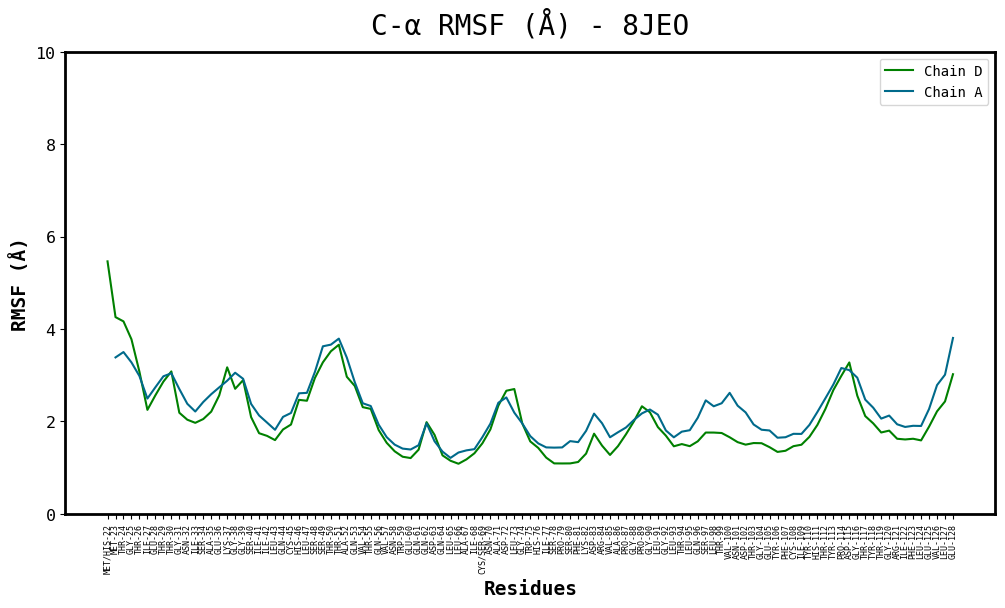

In [17]:
plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "monospace"  # Text font

border_linewidth = 2  # Adjust the linewidth as needed
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(border_linewidth)
plt.gca().spines['right'].set_linewidth(border_linewidth)
plt.gca().spines['bottom'].set_linewidth(border_linewidth)
plt.gca().spines['left'].set_linewidth(border_linewidth)

plt.plot(residues_list[1:-3], rmsfer_8jeo_Chain_D.results.rmsf, color="green", label="Chain D")
plt.plot(residues_list[2:-3], rmsfer_8jeo_Chain_A.results.rmsf, color="#006a8b", label="Chain A")

plt.ylim(0, 10)

# # Define the x range
# x = [0, 100]  # For example, from 0 to 10
# y = [4, 4]   # y is always 4, creating a horizontal line

# # Plot the line
# plt.plot(x, y, label='y = 4', color='black')

plt.legend()
plt.ylabel('RMSF (Å)', fontsize=14,  fontweight="bold")
plt.xlabel('Residues', fontsize=14, fontweight="bold")
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=12)
plt.title(label="C-α RMSF (Å) - 8JEO", fontsize=20, pad=13)

plt.savefig('8JEO_RMSF.svg', format='svg', bbox_inches='tight')
plt.show()

# Calculation of RMSD for each TIGIT monomer

In [11]:
# RMSD Calculations per Chain

u_8jeo.trajectory[0] # set to the first frame

rmsd_8jeo_Chain_A = rms.RMSD(u_8jeo.select_atoms("index 0:1030 and name CA"), verbose=True).run() 
rmsd_8jeo_Chain_D = rms.RMSD(u_8jeo.select_atoms("index 5439:6478 and name CA"), verbose=True).run()

  0%|          | 0/50001 [00:00<?, ?it/s]

  0%|          | 0/50001 [00:00<?, ?it/s]

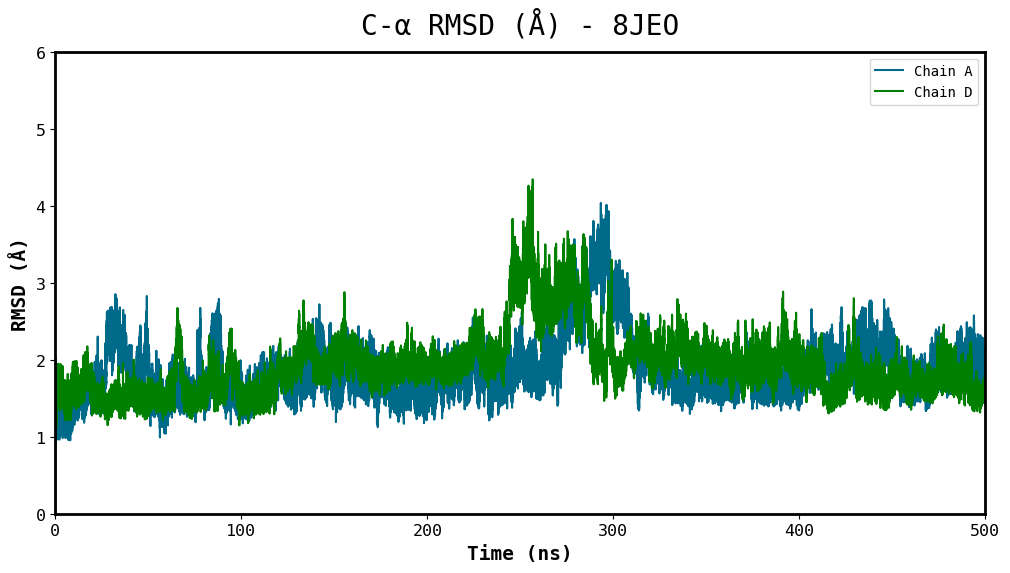

In [18]:
# Convert time from picoseconds to nanoseconds
time_ns_8jeo_A = rmsd_8jeo_Chain_A.results.rmsd[:, 1] / 1000
time_ns_8jeo_D = rmsd_8jeo_Chain_D.results.rmsd[:, 1] / 1000

plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "monospace"  # Text font

border_linewidth = 2  # Adjust the linewidth as needed
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(border_linewidth)
plt.gca().spines['right'].set_linewidth(border_linewidth)
plt.gca().spines['bottom'].set_linewidth(border_linewidth)
plt.gca().spines['left'].set_linewidth(border_linewidth)

plt.plot(time_ns_8jeo_A, rmsd_8jeo_Chain_A.results.rmsd[:,2], color="#006a8b", label="Chain A")
plt.plot(time_ns_8jeo_D, rmsd_8jeo_Chain_D.results.rmsd[:,2], color="green", label="Chain D")

plt.ylim(0, 6)
plt.xlim(0, 500)


plt.legend()
plt.ylabel('RMSD (Å)', fontsize=14,  fontweight="bold")
plt.xlabel('Time (ns)', fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label="C-α RMSD (Å) - 8JEO", fontsize=20, pad=13)

plt.savefig('8JEO_RMSD.svg', format='svg', bbox_inches='tight')
plt.show()